## Context

ABC Supermarket is planning for the year-end sale - they want to launch a new offer i.e. gold membership for only \\$499 that is of \\$999 on normal days (that gives 20% discount on all purchases) only for existing customers, for that they need to do a campaign through phone calls - the best way to reduce the cost of the campaign is to make a predictive model to classify customers who might purchase the offer, using the data they gathered during last year's campaign.

We will build a model for classifying whether customers will reply with a positive
response or not.

## Import Statements

In [657]:
# %pip install openpyxl
# %pip install scikit-learn
# %pip install numpy
# %pip install pandas
# %pip install matplotlib
# %pip install seaborn
# %pip install scipy

In [658]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from scipy.stats import uniform
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from scipy.stats import uniform
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [659]:
# Loading the data to the dataframe
df = pd.read_excel("marketing_data.xlsx")
df.shape

(2240, 22)

## Column Definitions
- Response (target) - 1 if customer accepted the offer in the last campaign, 0
otherwise
- Complain - 1 if a customer complained in the last 2 years
- DtCustomer - date of customer’s enrolment with the company
- Education - customer’s level of education
- Marital - customer’s marital status
- Kidhome - number of small children in customer’s household
- Teenhome - number of teenagers in customer’s household
- Income - customer’s yearly household income
- MntFishProducts - the amount spent on fish products in the last 2 years
- MntMeatProducts - the amount spent on meat products in the last 2 years
- MntFruits - the amount spent on fruits products in the last 2 years
- MntSweetProducts - amount spent on sweet products in the last 2 years
- MntWines - the amount spent on wine products in the last 2 years
- MntGoldProds - the amount spent on gold products in the last 2 years
- NumDealsPurchases - number of purchases made with discount
- NumCatalogPurchases - number of purchases made using catalog
- NumStorePurchases - number of purchases made directly in stores
- NumWebPurchases - number of purchases made through the company’s web site
- NumWebVisitsMonth - number of visits to company’s web site in the last month
- Recency - number of days since the last purchase
- ID - unique customer-id
- Year_Birth - customer's year of birth

## Data Profiling

In [660]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Response                 int64
Complain                 int64
dtype: object

In [661]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64

In [662]:
# Assuming you have a DataFrame named 'df'
total_rows = len(df)
print("Total number of rows:", total_rows)

Total number of rows: 2240


## Data Transformation

In [663]:
quantified_year = df
quantified_year["Year_Birth"] = pd.to_datetime(quantified_year["Year_Birth"], format = "%Y") # convert the number to datetime object
year = datetime.now().year # the assumed threshold is 2024
quantified_year["Age"] = year - quantified_year['Year_Birth'].dt.year

# Check the validity of Year_Birth and Dt_Customer and also check whether or not they are at least 18 years old.
def check_year_birth_before_dt_customer(df):
    df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], infer_datetime_format=True, errors='coerce')
    df = df.dropna(subset=['Dt_Customer'])
    df['Year_Birth'] = df['Year_Birth'].astype(str).str.extract('(\d+)')
    df['Year_Birth'] = pd.to_numeric(df['Year_Birth'], errors='coerce')
    
    df['Age_At_Registration'] = df['Dt_Customer'].dt.year - df['Year_Birth']
    filtered_df = df[(df['Year_Birth'] <= df['Dt_Customer'].dt.year) & (df['Age_At_Registration'] >= 18)]
    return filtered_df


df = check_year_birth_before_dt_customer(quantified_year)
df.dropna()

df['Age'].value_counts()

<>:10: SyntaxWarning: invalid escape sequence '\d'
<>:10: SyntaxWarning: invalid escape sequence '\d'
C:\Users\fabia\AppData\Local\Temp\ipykernel_13060\529558956.py:10: SyntaxWarning: invalid escape sequence '\d'
  df['Year_Birth'] = df['Year_Birth'].astype(str).str.extract('(\d+)')
C:\Users\fabia\AppData\Local\Temp\ipykernel_13060\529558956.py:8: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], infer_datetime_format=True, errors='coerce')
C:\Users\fabia\AppData\Local\Temp\ipykernel_13060\529558956.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dt_Customer'] = pd.to_datetime

Age
48     89
53     87
49     83
52     79
54     77
46     77
59     74
51     74
55     71
50     69
68     55
45     53
66     53
72     52
47     52
65     51
56     51
58     50
70     50
69     49
64     49
42     45
61     45
57     44
62     44
67     43
73     43
60     42
41     42
38     42
44     39
43     39
40     38
63     36
71     35
39     32
35     30
75     30
74     29
36     29
37     27
76     21
34     18
77     16
78     16
33     15
32     13
79      8
80      7
81      7
31      5
30      3
29      3
131     1
125     1
83      1
28      1
84      1
124     1
Name: count, dtype: int64

In [664]:
# df = df[df['Income'].notna()]

# Calculate the average income for each education category
average_income_by_education = df.groupby('Education')['Income'].mean()

# Fill missing values in 'Income' with the average income based on 'Education'
df['Income'] = df.apply(lambda row: average_income_by_education[row['Education']] if pd.isnull(row['Income']) else row['Income'], axis=1)

df['Income'].describe()


count      2237.000000
mean      52246.866026
std       25022.257031
min        1730.000000
25%       35544.000000
50%       51569.000000
75%       68274.000000
max      666666.000000
Name: Income, dtype: float64

In [665]:
print(df['Education'].unique() )
# pwede gawa one hot encode or label encoding

['Graduation' 'PhD' '2n Cycle' 'Master' 'Basic']


In [666]:
# Standardized datetime format in df['Dt_Customer']
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], errors='coerce')

# Calculate the minimum date in the 'Dt_Customer' column
min_date = df['Dt_Customer'].min()

# Compute the number of days since enrollment for each entry
df['Days_Since_Enrollment'] = (df['Dt_Customer'] - min_date).dt.days

# Print the first few rows to verify the changes
print(df[['Dt_Customer', 'Days_Since_Enrollment']].head())

  Dt_Customer  Days_Since_Enrollment
0  2014-06-16                    890
1  2014-06-15                    889
2  2014-05-13                    856
3  2014-11-05                   1032
4  2014-08-04                    939


## Initial Exploratory Data Analysis

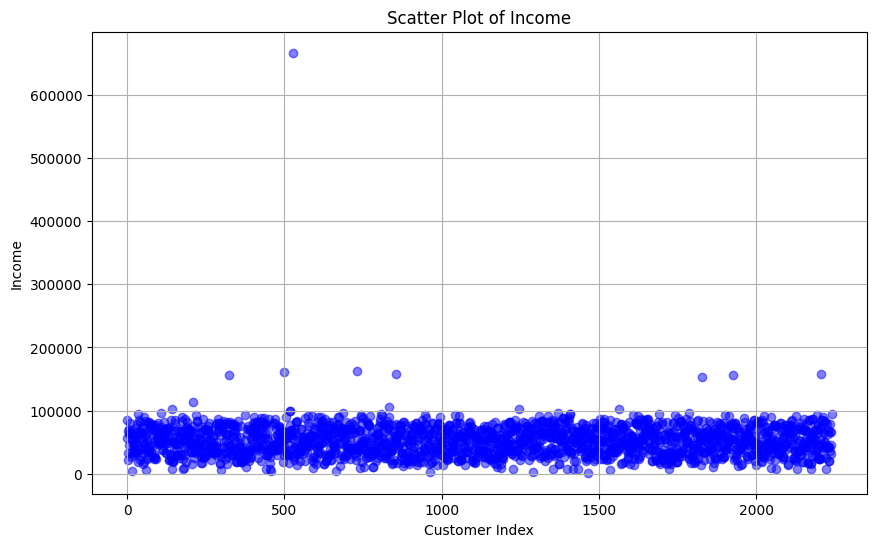

In [667]:

# Scatter plot for 'Income'
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['Income'], color='blue', alpha=0.5)  # Assuming 'df.index' represents individual customers
plt.title('Scatter Plot of Income')
plt.xlabel('Customer Index')
plt.ylabel('Income')
plt.grid(True)
plt.show()

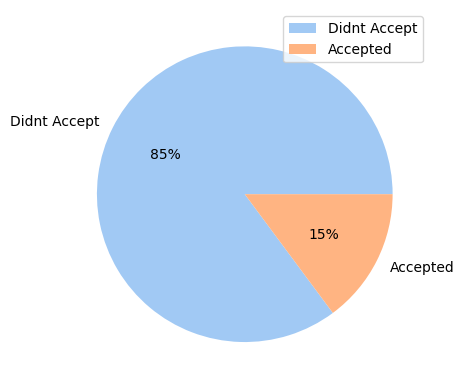

In [668]:
colors = sns.color_palette('pastel')[0:len(df['Response'].value_counts())]

#create pie chart
plt.pie(df['Response'].value_counts(), labels=['Didnt Accept', 'Accepted'], colors = colors, autopct='%.0f%%')
plt.legend()
plt.show()

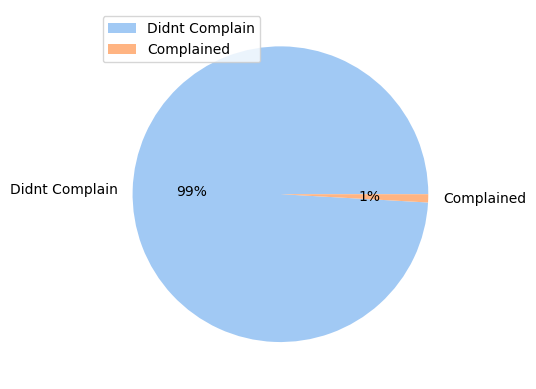

In [669]:
colors = sns.color_palette('pastel')[0:len(df['Complain'].value_counts())]

#create pie chart
plt.pie(df['Complain'].value_counts(), labels=['Didnt Complain', 'Complained'], colors = colors, autopct='%.0f%%')
plt.legend()
plt.show()

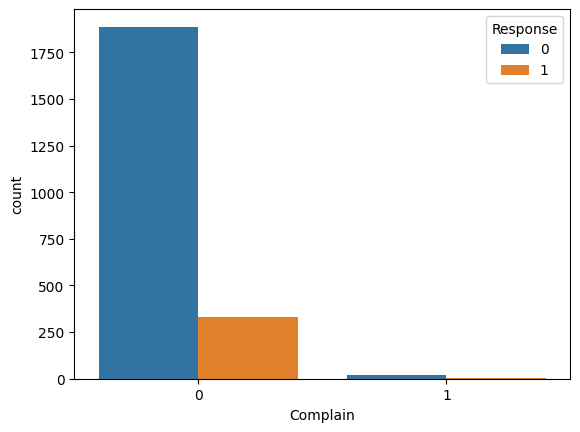

In [670]:
sns.barplot(x = 'Complain', y='count', hue = 'Response',data=df[['Complain', 'Response']].value_counts().reset_index())
    
plt.show()

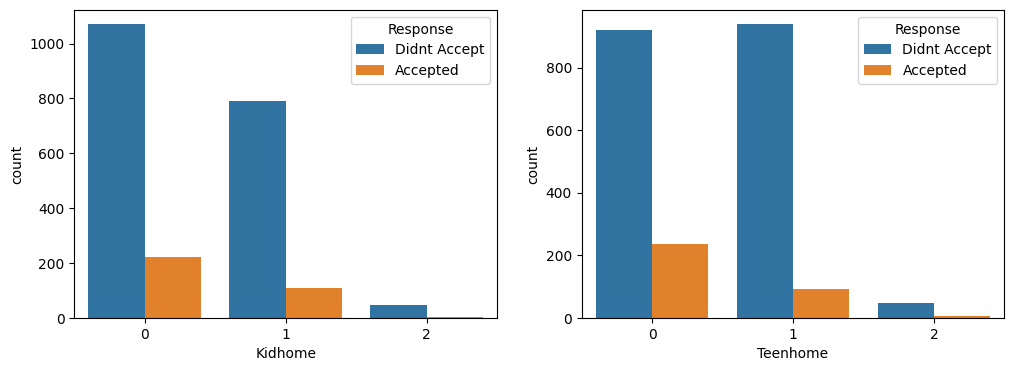

In [671]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))

for i, ax, col in zip(range(2), axes.flat, ['Kidhome', 'Teenhome']):
    tmp = df[[col, 'Response']].value_counts().to_frame().reset_index()
    tmp['Response'] = tmp['Response'].replace({0: 'Didnt Accept', 1: 'Accepted'})

    sns.barplot(x = col, y='count', 
                   hue = 'Response',data=tmp, ax=ax)
    
plt.show()

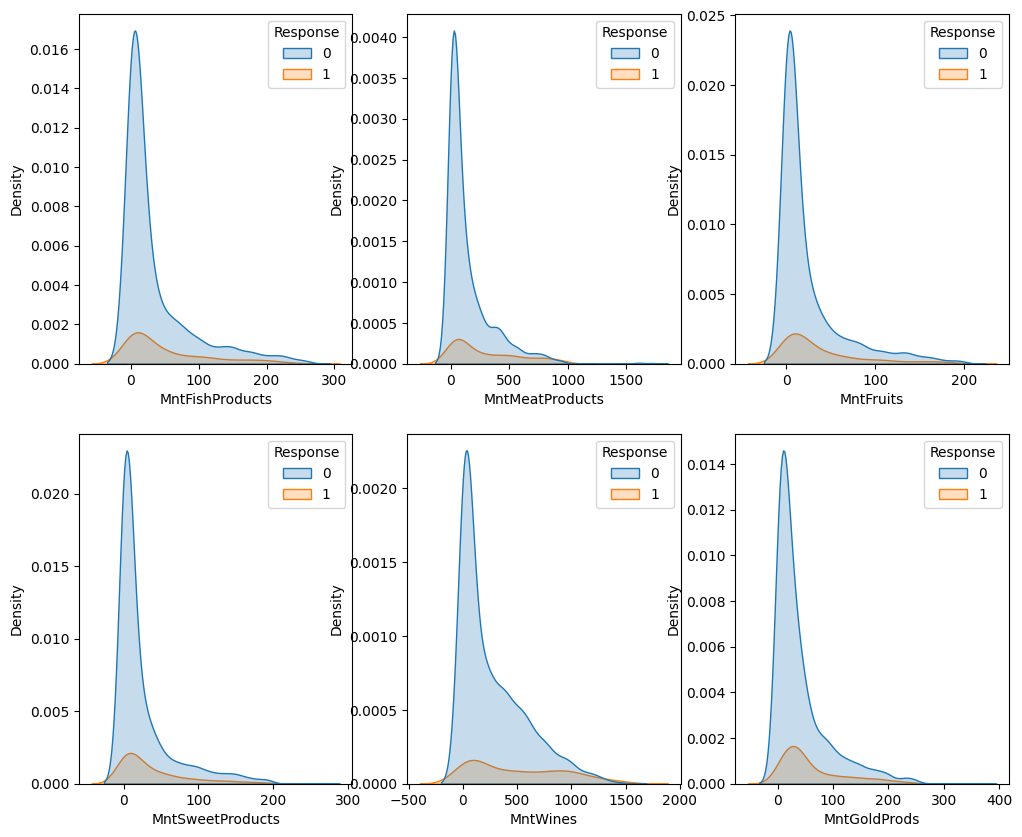

In [672]:
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(12, 10))

for i, ax, col in zip(range(6), axes.flat, ['MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntSweetProducts', 'MntWines', 'MntGoldProds']):
    sns.kdeplot(df, x=col, hue='Response', fill=True, ax=ax)
    
plt.show()

## Preprocessing

### Feature Engineering

In [673]:
# Create binary feature indicating whether a person is married or not
df['Is_Married'] = df['Marital_Status'].apply(lambda x: 1 if x in ['Married', 'Together'] else 0)
df['Is_Married'].value_counts()


Is_Married
1    1443
0     794
Name: count, dtype: int64

In [674]:
# Assuming 'df' is your DataFrame containing columns for different product categories (e.g., MntFishProducts, MntMeatProducts, MntFruits, MntSweetProducts, MntWines, MntGoldProds)

# Create a new feature representing the total amount spent on all products
df['Total_Amount_Spent'] = df['MntFishProducts'] + df['MntMeatProducts'] + df['MntFruits'] + df['MntSweetProducts'] + df['MntWines'] + df['MntGoldProds']

df['Total_Amount_Spent'].value_counts()

Total_Amount_Spent
46      19
22      18
57      16
55      15
44      15
        ..
989      1
1155     1
1890     1
1456     1
1078     1
Name: count, Length: 1053, dtype: int64

In [675]:
# Assuming 'df' is your DataFrame containing columns 'Kidhome' and 'Teenhome'

# Create a new binary feature indicating whether the customer has children
df['Has_Children'] = (df['Kidhome'] + df['Teenhome'] > 0).astype(int)

# Print the first few rows to verify the changes
print(df[['Kidhome', 'Teenhome', 'Has_Children']].head())

df['Has_Children'].value_counts()

   Kidhome  Teenhome  Has_Children
0        0         0             0
1        0         0             0
2        0         1             1
3        1         1             1
4        1         0             1


Has_Children
1    1602
0     635
Name: count, dtype: int64

In [676]:
# Assuming 'df' is your DataFrame containing the columns 'Income' and 'Total_Amount_Spent'

# Create a new column for the ratio of 'Total_Amount_Spent' to 'Income' 
df['Total_Spent_to_Income_Ratio'] = df['Total_Amount_Spent'] / df['Income']

# Print the first few rows to verify the changes
print(df[['Income', 'Total_Amount_Spent', 'Total_Spent_to_Income_Ratio']].head())

df['Total_Spent_to_Income_Ratio'].value_counts()

    Income  Total_Amount_Spent  Total_Spent_to_Income_Ratio
0  84835.0                1190                     0.014027
1  57091.0                 577                     0.010107
2  67267.0                 251                     0.003731
3  32474.0                  11                     0.000339
4  21474.0                  91                     0.004238


Total_Spent_to_Income_Ratio
0.001366    4
0.017407    3
0.014223    3
0.002603    3
0.003210    3
           ..
0.001229    1
0.001693    1
0.015817    1
0.001597    1
0.011363    1
Name: count, Length: 2031, dtype: int64

In [677]:
# Extract the month of enrollment
df['Enrollment_Month'] = df['Dt_Customer'].dt.month

df['Enrollment_Month'].value_counts()

Enrollment_Month
8     211
10    209
3     202
12    201
5     192
1     191
2     187
11    185
4     184
6     170
9     164
7     141
Name: count, dtype: int64

In [678]:
# Create a new feature representing the household size
# If married, count 2 (husband and wife), if not, count 1
df['Household_Size'] = df['Kidhome'] + df['Teenhome'] + (df['Is_Married'] + 1)

# Create a new feature representing the total amount spent per product category per household member
df['Spent_Per_Household_Member'] = df['Total_Amount_Spent'] / df['Household_Size']

df['Spent_Per_Household_Member'].describe()

count    2237.000000
mean      325.906579
std       430.594684
min         1.600000
25%        24.000000
50%       144.333333
75%       480.000000
max      2525.000000
Name: Spent_Per_Household_Member, dtype: float64

In [679]:
# Define a function to determine the preferred purchase channel
def preferred_channel(row):
    channels = ['NumDealsPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebPurchases']
    max_channel = max(channels, key=lambda x: row[x])
    return max_channel

# Apply the function to create a new column indicating the preferred channel
df['PreferredChannel'] = df.apply(preferred_channel, axis=1)

print(df[['ID', 'PreferredChannel']])

         ID   PreferredChannel
0      1826  NumStorePurchases
1         1  NumStorePurchases
2     10476  NumStorePurchases
3      1386  NumStorePurchases
4      5371    NumWebPurchases
...     ...                ...
2235  10142  NumStorePurchases
2236   5263  NumStorePurchases
2237     22    NumWebPurchases
2238    528  NumStorePurchases
2239   4070    NumWebPurchases

[2237 rows x 2 columns]


In [680]:
# Suppose 'data' is your DataFrame and 'columns_to_encode' is a list of columns to label encode
columns_to_encode = ['Education','PreferredChannel']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each column
for col in columns_to_encode:
    df[col + '_encoded'] = label_encoder.fit_transform(df[col])


In [681]:
X = df.drop('Response', axis=1).iloc[:,1:][[
    'Spent_Per_Household_Member',
    'PreferredChannel_encoded',
    'Enrollment_Month',
    'Total_Spent_to_Income_Ratio',
    'Complain',
    'Recency',
    'Age',
    'Education_encoded',
    'Is_Married',
    'Days_Since_Enrollment',
    'Kidhome',
    'Teenhome',
    'Has_Children',
    'MntFishProducts', 
    'MntMeatProducts', 
    'MntFruits', 
    'MntSweetProducts', 
    'MntWines', 
    'MntGoldProds',
    'NumDealsPurchases', 
    'NumWebPurchases', 
    'NumCatalogPurchases', 
    'NumStorePurchases', 
    'NumWebVisitsMonth'
    ]]
y = df['Response']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

### Handling Outliers

In [682]:
# Removing Outliers

# Calculate Z-scores for each feature
z_scores = stats.zscore(X_train)

# Define a threshold for Z-score
threshold = 3

# Find indices of outliers
outlier_indices = (abs(z_scores) > threshold).any(axis=1)

# Remove outliers from the training data
X_train = X_train[~outlier_indices]
y_train = y_train[~outlier_indices]

# Print the number of outliers removed
print("Number of outliers removed:", sum(outlier_indices))

Number of outliers removed: 234


### Splitting the data into training and testing sets.

In [683]:
# Generate synthetic data for demonstration
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Standardization

In [684]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Modelling

In [685]:
# Handling class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

In [686]:
# Feature selection using Random Forest
clf_rf = RandomForestClassifier(random_state=42)
clf_rf.fit(X_train_balanced, y_train_balanced)
feature_importance = clf_rf.feature_importances_
selector = SelectFromModel(clf_rf, threshold=0.05)
selector.fit(X_train_balanced, y_train_balanced)
X_train_selected = selector.transform(X_train_balanced)
X_test_selected = selector.transform(X_test_scaled)

In [687]:
# Initialize SVM classifier
clf = SVC(random_state=0)

In [688]:
# Define the hyperparameter distribution for Randomized Search
param_distribution = {'C': uniform(loc=0, scale=10),
                      'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
                      'gamma': ['scale', 'auto']}

# Perform Randomized Search with 5-fold cross-validation
random_search = RandomizedSearchCV(clf, param_distributions=param_distribution, n_iter=100, cv=5, scoring='accuracy', random_state=0)
random_search.fit(X_train_selected, y_train_balanced)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Initialize SVM classifier with the best hyperparameters
best_clf = SVC(C=best_params['C'], kernel=best_params['kernel'], gamma=best_params['gamma'], random_state=0)


Best Hyperparameters: {'C': 6.120957227224214, 'gamma': 'scale', 'kernel': 'rbf'}


In [689]:
# Train the model with the best hyperparameters
best_clf.fit(X_train_selected, y_train_balanced)

# Make predictions
preds_tuned = best_clf.predict(X_test_selected)


## Evaluation

In [690]:
# Evaluate performance metrics
acc_tuned = accuracy_score(y_test, preds_tuned)
prec_tuned = precision_score(y_test, preds_tuned)
rec_tuned = recall_score(y_test, preds_tuned)
f1_tuned = f1_score(y_test, preds_tuned)
auc_tuned = roc_auc_score(y_test, preds_tuned)

print("\nSVM:")
print("Accuracy: {:.4f}".format(acc_tuned))
print("Precision: {:.4f}".format(prec_tuned))
print("Recall: {:.4f}".format(rec_tuned))
print("F1 Score: {:.4f}".format(f1_tuned))
print("AUC: {:.4f}".format(auc_tuned))

# Check for overfitting with tuned model
print('\nTraining set score: {:.4f}'.format(best_clf.score(X_train_selected, y_train_balanced)))
print('Test set score: {:.4f}'.format(best_clf.score(X_test_selected, y_test)))


SVM:
Accuracy: 0.8750
Precision: 0.9184
Recall: 0.8411
F1 Score: 0.8780
AUC: 0.8775

Training set score: 0.8845
Test set score: 0.8750


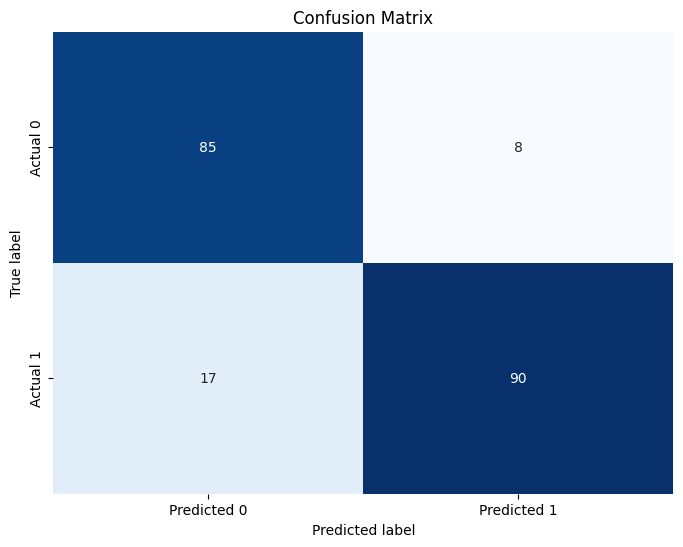

In [691]:
# Generate confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()